<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'>INF-391 Reconocimiento de patrones </h1>

<H3 align='center'> Tarea 2  </H3>
<H3 align='center'> Jorge Contreras Cabreras 201573547-6  </H3>
<H3 align='center'> César Quiroz Mansilla 201573578-6  </H3>
<H3 align='center'> Estebal Tapia Manzano 201573511-5  </H3>
<hr style="height:2px;border:none"/>

# Parte I
### Lectura y Análisis de datasets

In [1]:
import numpy as np
import pandas as pd
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline

Ocupamos la librería pandas para leer los tres dataset que se trabajarán en el laboratorio. Para ello, ocupamos la función read_csv a la cual le indicamos el archivo txt a leer, el nombre de las columnas que corresponden a las coordenadas x e y, y la separación para que la libreria sepa hasta cuando leer en cada columna.

In [2]:
column_names = ["x","y"]
mouse = pd.read_csv("mouse.txt", names=column_names, sep ="\t")
smile = pd.read_csv("smile.txt", names=column_names, sep ="\t")
spiral = pd.read_csv("spiral.txt", names=column_names, sep ="\t")

In [3]:
print("Dataset mouse\n",mouse.head(5),"\nShape:",mouse.shape,"\n")
print("Dataset smile\n",smile.head(5),"\nShape",smile.shape,"\n")
print("Dataset spiral\n",spiral.head(5),"\nShape",spiral.shape,"\n")

Dataset mouse
           x         y
0  0.456601  0.432806
1  0.611378  0.528625
2  0.450299  0.711606
3  0.639015  0.460744
4  0.628957  0.323470 
Shape: (500, 2) 

Dataset smile
           x         y
0 -0.303573  0.722940
1 -0.288011  0.692245
2 -0.306319  0.708402
3 -0.304490  0.714163
4 -0.288526  0.693369 
Shape (1000, 2) 

Dataset spiral
        x     y
0  31.95  7.95
1  31.15  7.30
2  30.45  6.65
3  29.70  6.00
4  28.90  5.55 
Shape (312, 2) 



Los datos que entrega la cabecera de cada dataframe son efectivamente los valores que se encuentran en los txt, sin embargo, es posible observar que para el dataset mouse, hay un truncamiento de decimales, ya que no presenta la misma cantidad de cifras significativas que se encuentran en el txt. Sin embargo, al evaluar cada valor perteneciente al datafrase, obtenemos:

In [4]:
print("x0: ",mouse["x"][0], "y0: ",mouse["y"][0])
print("x1: ",mouse["x"][1], "y1: ",mouse["y"][1])

x0:  0.456601376346254 y0:  0.43280640922410796
x1:  0.611378467222419 y1:  0.528624598889498


Por lo cual, lo anterior se debía solo a una apreciación visual que entrega python, en el procesador los valores numéricos serán exactamente iguales a los pertenecientes al txt.

Como los datos corresponden a coordenadas de un plano cartesiano, la mejor forma de evidenciar la correcta lectura de estos es mostrarlos gráficamente, en vez de mostrar solo una serie de números decimales, por lo cual, a través de la librería matplotlib se hace un scatter plot de cada dataset.

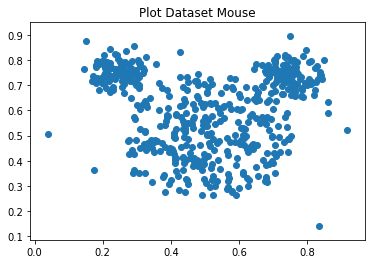

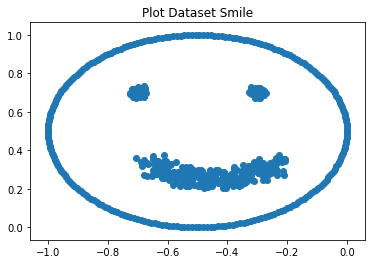

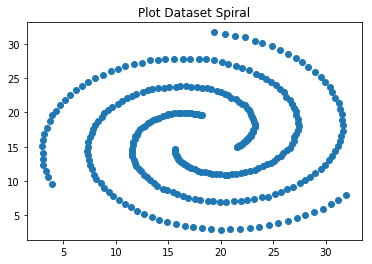

In [5]:
plt.scatter(mouse["x"], mouse["y"])
plt.title("Plot Dataset Mouse")
plt.show()

plt.scatter(smile["x"], smile["y"])
plt.title("Plot Dataset Smile")
plt.show()

plt.scatter(spiral["x"], spiral["y"])
plt.title("Plot Dataset Spiral")
plt.show()

El gráfico de los datos da el resultado esperado, y ya se tiene una noción de como se distribuyen en efectos prácticos, por lo cual, procedemos a trabajar con los algoritmos de clustering.

### Algoritmos


Para el trabajo con los algoritmos de clustering, vamos a ocupar la librería de machine learning para python scikit-learn. Y vamos a llevar los datos de cada pandas dataframe a un numpy array 2d.

In [6]:
mouse_xy = []; smile_xy = []; spiral_xy = []
for index, row in mouse.iterrows():
    mouse_xy.append([row.x,row.y])
for index, row in smile.iterrows():
    smile_xy.append([row.x,row.y])
for index, row in spiral.iterrows():
    spiral_xy.append([row.x,row.y])
mouse_xy=np.array(mouse_xy)
smile_xy=np.array(smile_xy)
spiral_xy=np.array(spiral_xy)

#### K-Means

Es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano

##### Data ser mouse.txt

In [7]:
from sklearn.cluster import KMeans
def K_means(n_clusters=4):
    kmeans = KMeans(n_clusters).fit(mouse_xy)
    centers = kmeans.cluster_centers_
    y_kmeans = kmeans.predict(mouse_xy)
    colores=['red','green','blue','cyan','yellow']
    plt.scatter(mouse_xy[:, 0], mouse_xy[:, 1], c=y_kmeans, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    plt.title("K-Means in data mouse.txt")
    plt.show()

interact(K_means, n_clusters=(1,10,1))

interactive(children=(IntSlider(value=4, description='n_clusters', max=10, min=1), Output()), _dom_classes=('w…

<function __main__.K_means(n_clusters=4)>

##### Data set smile.txt

In [8]:
def K_means(n_clusters=4):
    kmeans = KMeans(n_clusters).fit(smile_xy)
    centers = kmeans.cluster_centers_
    y_kmeans = kmeans.predict(smile_xy)
    colores=['red','green','blue','cyan','yellow']
    plt.scatter(smile_xy[:, 0], smile_xy[:, 1], c=y_kmeans, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    plt.title("K-Means in data smile.txt")
    plt.show()

interact(K_means, n_clusters=(1,10,1))

interactive(children=(IntSlider(value=4, description='n_clusters', max=10, min=1), Output()), _dom_classes=('w…

<function __main__.K_means(n_clusters=4)>

##### Data set spiral.txt

In [9]:
def K_means(n_clusters=4):
    kmeans = KMeans(n_clusters).fit(spiral_xy)
    centers = kmeans.cluster_centers_
    y_kmeans = kmeans.predict(spiral_xy)
    colores=['red','green','blue','cyan','yellow']
    plt.scatter(spiral_xy[:, 0], spiral_xy[:, 1], c=y_kmeans, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    plt.title("K-Means in data spiral.txt")
    plt.show()

interact(K_means, n_clusters=(1,10,1))

interactive(children=(IntSlider(value=4, description='n_clusters', max=10, min=1), Output()), _dom_classes=('w…

<function __main__.K_means(n_clusters=4)>

El algoritmo k-means tiene un resultado deficiente entre los dataset estudiados, no logra generar grupos de cluster bien definidos y que tengan una relación gráfica más potente. Mouse es el dataset que mejores resultados entrega, endonde la cantidad más adecuada de clústers corresponde a 5, aunque si se agregan más, sigue comportándose de manera adecuada. El dataset spial por el contrario, realiza agrupaciones muy inadecuadas, no logrando agrupar para spiral por separado, y esto se debe netamente a la ecuación matemática y a la generación de centroides que posee el método agrupativo de k-means. Como primer algoritmo analizado, y sin conocer los demás, es posible mencionar que k-means no es la solución indicada para este conjunto de datasets.

#### Agglomerative Hierarchical Clustering:

##### a) complete link

###### Data set mouse.txt

In [10]:
from sklearn.cluster import AgglomerativeClustering
def complete_link(n_clusters=4):
    complete_link = AgglomerativeClustering(n_clusters, linkage = "complete").fit(mouse_xy)
    y_complete_link = complete_link.fit_predict(mouse_xy)
    colores=['red','green','blue','cyan','yellow']
    plt.scatter(mouse_xy[:, 0], mouse_xy[:, 1], c=y_complete_link, s=50, cmap='viridis')
    plt.title("Complete link in data mouse.txt")
    plt.show()

interact(complete_link, n_clusters=(1,10,1))

interactive(children=(IntSlider(value=4, description='n_clusters', max=10, min=1), Output()), _dom_classes=('w…

<function __main__.complete_link(n_clusters=4)>

##### Data set smile.txt

In [11]:
def complete_link(n_clusters=4):
    complete_link = AgglomerativeClustering(n_clusters, linkage = "complete").fit(smile_xy)
    y_complete_link = complete_link.fit_predict(smile_xy)
    colores=['red','green','blue','cyan','yellow']
    plt.scatter(smile_xy[:, 0], smile_xy[:, 1], c=y_complete_link, s=50, cmap='viridis')
    plt.title("Complete link in data smile.txt")
    plt.show()

interact(complete_link, n_clusters=(1,10,1))

interactive(children=(IntSlider(value=4, description='n_clusters', max=10, min=1), Output()), _dom_classes=('w…

<function __main__.complete_link(n_clusters=4)>

##### Data set spiral.txt

In [12]:
def complete_link(n_clusters=4):
    complete_link = AgglomerativeClustering(n_clusters, linkage = "complete").fit(spiral_xy)
    y_complete_link = complete_link.fit_predict(spiral_xy)
    colores=['red','green','blue','cyan','yellow']
    plt.scatter(spiral_xy[:, 0], spiral_xy[:, 1], c=y_complete_link, s=50, cmap='viridis')
    plt.title("Complete link in data spiral.txt")
    plt.show()

interact(complete_link, n_clusters=(1,10,1))

interactive(children=(IntSlider(value=4, description='n_clusters', max=10, min=1), Output()), _dom_classes=('w…

<function __main__.complete_link(n_clusters=4)>

Complete link tiene un resultado muy similar a k-means, de hecho, los dataset mouse y smile poseen un comportamiento casi idéntico, el dataset smile es el que más se diferencia del anterior, y eso es porque en complete link tiene aún un peor desempeño que en k-means, siendo 5 la cantidad de clústers más óptima, pero que no logra identificar ningú grupo geométrico definido dentro de la gráfica, no es un buen algormitmo para los datos trabajados.

##### b) single link

##### Data set mouse.txt

In [13]:
def single_link(n_clusters=4):
    single_link = AgglomerativeClustering(n_clusters, linkage = "single").fit(mouse_xy)
    y_single_link = single_link.fit_predict(mouse_xy)
    plt.scatter(mouse_xy[:, 0], mouse_xy[:, 1], c=y_single_link, s=50, cmap='viridis')
    plt.title("Single link data mouse.txt")
    plt.show()
    
interact(single_link, n_clusters=(1,10,1))

interactive(children=(IntSlider(value=4, description='n_clusters', max=10, min=1), Output()), _dom_classes=('w…

<function __main__.single_link(n_clusters=4)>

##### Data set smile.txt

In [14]:
def single_link(n_clusters=4):
    single_link = AgglomerativeClustering(n_clusters, linkage = "single").fit(smile_xy)
    y_single_link = single_link.fit_predict(smile_xy)
    plt.scatter(smile_xy[:, 0], smile_xy[:, 1], c=y_single_link, s=50, cmap='viridis')
    plt.title("Single link data smile.txt")
    plt.show()
    
interact(single_link, n_clusters=(1,10,1))

interactive(children=(IntSlider(value=4, description='n_clusters', max=10, min=1), Output()), _dom_classes=('w…

<function __main__.single_link(n_clusters=4)>

##### Data set spiral.txt

In [15]:
def single_link(n_clusters=4):
    single_link = AgglomerativeClustering(n_clusters, linkage = "single").fit(spiral_xy)
    y_single_link = single_link.fit_predict(spiral_xy)
    plt.scatter(spiral_xy[:, 0], spiral_xy[:, 1], c=y_single_link, s=50, cmap='viridis')
    plt.title("Single link data spiral.txt")
    plt.show()
    
interact(single_link, n_clusters=(1,10,1))

interactive(children=(IntSlider(value=4, description='n_clusters', max=10, min=1), Output()), _dom_classes=('w…

<function __main__.single_link(n_clusters=4)>

Single link tiene un comportamiento dual extremo, a que nos referimos con esto, dependiendo del dataset se comporta de muy mala manera, o de muy buena manera. Partamos analizando el dataset mouse, independiente de la cantidad de clústers que le pongamos, el resultado es paupérrimo, ya que va tomando outliers y los va haciendo cluster, entonces tenemos un clúster inicial que es una masa acumulada de puntos, y al ir aumentando los clúster solo va agrupando outliers, lo cual es una pésima agrupación. Para smile y spiral por el contrario, tiene un comportamiento increíble, ocupando 3 clúster en spiral y 4 en smile, logra agrupar tanto los espirales como los ojos, la boca y el controno de la cara, llegando a ser una agrupación perfecta gráficamente hablando.

#### DBSCAN

##### Data set mouse.txt

In [16]:
from sklearn.cluster import DBSCAN
def Dbscan(eps=0.05, min_samples=13):
    # Compute DBSCAN
    db = DBSCAN(eps, min_samples).fit(mouse_xy)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    # Plot result
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
        class_member_mask = (labels == k)
        xy = mouse_xy[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
        xy = mouse_xy[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=6)
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
interact(Dbscan, eps=(0.01,3.0,0.01),min_samples=(2,20,1))

interactive(children=(FloatSlider(value=0.05, description='eps', max=3.0, min=0.01, step=0.01), IntSlider(valu…

<function __main__.Dbscan(eps=0.05, min_samples=13)>

##### Data sert Smile.txt

In [17]:
def Dbscan(eps=0.05, min_samples=13):
    # Compute DBSCAN
    db = DBSCAN(eps, min_samples).fit(smile_xy)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    # Plot result
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
        class_member_mask = (labels == k)
        xy = smile_xy[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
        xy = smile_xy[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=6)
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
interact(Dbscan, eps=(0.01,3.0,0.01),min_samples=(2,20,1))

interactive(children=(FloatSlider(value=0.05, description='eps', max=3.0, min=0.01, step=0.01), IntSlider(valu…

<function __main__.Dbscan(eps=0.05, min_samples=13)>

##### Data set spiral.txt

In [18]:
def Dbscan(eps=1, min_samples=4):
    # Compute DBSCAN
    db = DBSCAN(eps, min_samples).fit(spiral_xy)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    # Plot result
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
        class_member_mask = (labels == k)
        xy = spiral_xy[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
        xy = spiral_xy[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=6)
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
interact(Dbscan, eps=(0.01,3.0,0.01),min_samples=(2,20,1))

interactive(children=(FloatSlider(value=1.0, description='eps', max=3.0, min=0.01, step=0.01), IntSlider(value…

<function __main__.Dbscan(eps=1, min_samples=4)>

DBSCAN entrega resultados muy adecuados para todos los dataset a trabajar, logra identificar graficamente los grupos adecuados para generar los clústers en el dataet smile, para spiral no se comporta de la mejor manera, ya que si bien logra identificar los espirales, a veces crea más de los debidos haciendo separaciones inncesarias. En mouse logra crear tres cluster lo suficientemente adecuados graficamente. En general, los resultados son buenos, pero no excelentes.

#### Mean-shift

##### Data set mouse.txt

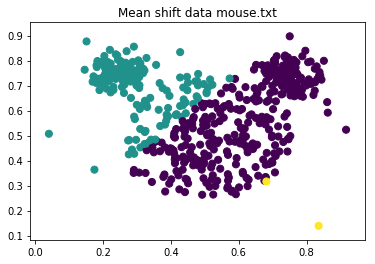

In [19]:
from sklearn.cluster import MeanShift
def mean_shift():
    mean_shift = MeanShift().fit(mouse_xy)
    y_mean_shift = mean_shift.fit_predict(mouse_xy)
    plt.scatter(mouse_xy[:, 0], mouse_xy[:, 1], c=y_mean_shift, s=50, cmap='viridis')
    plt.title("Mean shift data mouse.txt")
    plt.show()

mean_shift()

##### Data set smile.txt

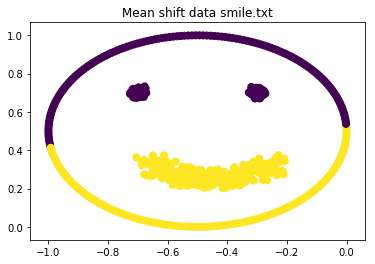

In [20]:
def mean_shift():
    mean_shift = MeanShift().fit(smile_xy)
    y_mean_shift = mean_shift.fit_predict(smile_xy)
    plt.scatter(smile_xy[:, 0], smile_xy[:, 1], c=y_mean_shift, s=50, cmap='viridis')
    plt.title("Mean shift data smile.txt")
    plt.show()

mean_shift()

##### Data set spiral.txt

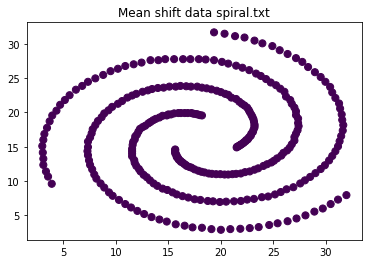

In [21]:
def mean_shift():
    mean_shift = MeanShift().fit(spiral_xy)
    y_mean_shift = mean_shift.fit_predict(spiral_xy)
    plt.scatter(spiral_xy[:, 0], spiral_xy[:, 1], c=y_mean_shift, s=50, cmap='viridis')
    plt.title("Mean shift data spiral.txt")
    plt.show()

mean_shift()

Mean Shift genera 3 clústers en mouse, 2 en smile y sólo uno en spiral. Para el último no queda mayor explicación, no logra identificar una agrupación adecuada de puntos que tengan alguna similitus en particular, por lo cual deja a la data inmutable, para mouse, logra hacer dos clúster relativamente similares, pero uno sólo son un par de puntos que no tienen mayor relación entre sí. Y para smile es donde entrega un mejor desempeño, en donde divide el dataset en dos hemisferios por una vertical. En síntesis, Mean Shift no entrega agrupaciones adecuadas.

#### Spectral clustering

##### Data set mouse.txt

In [22]:
from sklearn.cluster import SpectralClustering
def spectral(n_clusters=5):
    spectral_clustering = SpectralClustering(n_clusters).fit(mouse_xy)
    y_spectral = spectral_clustering.fit_predict(mouse_xy)
    plt.scatter(mouse_xy[:, 0], mouse_xy[:, 1], c=y_spectral, s=50, cmap='viridis')
    plt.title("Spectral clustering data mouse.txt")
    plt.show()
    
interact(spectral,n_clusters=(1,10,1))    

interactive(children=(IntSlider(value=5, description='n_clusters', max=10, min=1), Output()), _dom_classes=('w…

<function __main__.spectral(n_clusters=5)>

##### Data set smile.txt

In [23]:
def spectral(n_clusters=5):
    spectral_clustering = SpectralClustering(n_clusters).fit(smile_xy)
    y_spectral = spectral_clustering.fit_predict(smile_xy)
    plt.scatter(smile_xy[:, 0], smile_xy[:, 1], c=y_spectral, s=50, cmap='viridis')
    plt.title("Spectral clustering data smile.txt")
    plt.show()
    
interact(spectral,n_clusters=(1,10,1))  

interactive(children=(IntSlider(value=5, description='n_clusters', max=10, min=1), Output()), _dom_classes=('w…

<function __main__.spectral(n_clusters=5)>

##### Data set spiral.txt

In [24]:
def spectral(n_clusters=5):
    spectral_clustering = SpectralClustering(n_clusters).fit(spiral_xy)
    y_spectral = spectral_clustering.fit_predict(spiral_xy)
    plt.scatter(spiral_xy[:, 0], spiral_xy[:, 1], c=y_spectral, s=50, cmap='viridis')
    plt.title("Spectral clustering data spiral.txt")
    plt.show()
    
interact(spectral,n_clusters=(1,10,1))  

interactive(children=(IntSlider(value=5, description='n_clusters', max=10, min=1), Output()), _dom_classes=('w…

<function __main__.spectral(n_clusters=5)>

Spectral clústering posee un comportamiento muy similar a complete link en los dataset mouse y smile, eligiendo 5 y 4 clústers respectivamente, por lo cual el análisis es muy similar. Para spiral por el contrario, presenta un comportamiento similar al otro Agglomerative Hierarchical Clustering, single link, ya que se comporta perfectamente, logrando generar agrupaciones de puntos que corresponden a los spirales graficamente hablando.

#### Fuzzy C-Means


+ *conda install -c conda-forge scikit-fuzzy*

+ *conda install -c conda-forge/label/gcc7 scikit-fuzzy*

+ *conda install -c conda-forge/label/cf201901 scikit-fuzzy* 


##### Data set mouse.txt


In [26]:
import skfuzzy.cluster as fuzzy

def fuzzy_c_means(n_clusters=5):
    data=mouse_xy.transpose()
    cntr, u, u0, d, jm, p, fpc=fuzzy.cmeans(data,n_clusters,5, error=0.005, maxiter=1000, init=None)
    cluster_membership = np.argmax(u, axis=0)
    plt.scatter(mouse_xy[:, 0], mouse_xy[:, 1], c=cluster_membership, s=50, cmap='viridis')
    plt.title("Fuzzy data mouse.txt")
    plt.show()
    
interact(fuzzy_c_means, n_clusters=(1,10,1))

interactive(children=(IntSlider(value=5, description='n_clusters', max=10, min=1), Output()), _dom_classes=('w…

<function __main__.fuzzy_c_means(n_clusters=5)>

##### Data set Smile.txt

In [27]:
def fuzzy_c_means(n_clusters=5):
    data=smile_xy.transpose()
    cntr, u, u0, d, jm, p, fpc=fuzzy.cmeans(data,n_clusters,5, error=0.005, maxiter=1000, init=None)
    cluster_membership = np.argmax(u, axis=0)
    plt.scatter(smile_xy[:, 0], smile_xy[:, 1], c=cluster_membership, s=50, cmap='viridis')
    plt.title("Fuzzy data smile.txt")
    plt.show()
    
interact(fuzzy_c_means, n_clusters=(1,10,1))

interactive(children=(IntSlider(value=5, description='n_clusters', max=10, min=1), Output()), _dom_classes=('w…

<function __main__.fuzzy_c_means(n_clusters=5)>

##### Data set spiral.txt

In [28]:
def fuzzy_c_means(n_clusters=5):
    data=spiral_xy.transpose()
    cntr, u, u0, d, jm, p, fpc=fuzzy.cmeans(data,n_clusters,5, error=0.005, maxiter=1000, init=None)
    cluster_membership = np.argmax(u, axis=0)
    plt.scatter(spiral_xy[:, 0], spiral_xy[:, 1], c=cluster_membership, s=50, cmap='viridis')
    plt.title("Fuzzy data spiral.txt")
    plt.show()
    
interact(fuzzy_c_means, n_clusters=(1,10,1))

interactive(children=(IntSlider(value=5, description='n_clusters', max=10, min=1), Output()), _dom_classes=('w…

<function __main__.fuzzy_c_means(n_clusters=5)>

**Conclusión**

De acuerdo al análisis de todos los algoritmos de clustering mencionados, llegamos a la conclusión de que, considerando los tres dataset, el que se comporta mejor para todos es Spectral clustering, ya que logra crear agrupaciones adeacuadas de acuerdo al gráfico correspondiente. single link estuvo muy cerca, ya que tiene el mejor comportamiento en smile, pero su paupérrimo resultado en mouse hace que no sea posible elegirlo.
 

# Parte 2

### Pregunta a

**Se tiene un conjunto de datos con 100 objetos. Se le pide realizar clustering utilizando
K-means, pero para todos los valores de k, 1 ≤ k ≤ 100, el algoritmo retorna que todos los
clusters estan vacíos, excepto uno. ¿En que situación podría ocurrir esto? (analice los datos
y no los parametros del algoritmo, i.e., iteraciones). ¿Qué resultado tendría single-link y
DBSCAN para este tipo de datos?**

k-means, entrega todos los clustering vacíos excepto uno, en caso de que todos los puntos (100 objetos) estén muy cercanos a un solo centro y que estén muy cercanos entre si (un punto encima de otro), por lo que un clúster agarraría todos los puntos a su alrededor producto de su cercanía a estos y el uso de la distancia euclidiana. De esta forma, los puntos tienen que estar muy juntos y todos cercanos a un mismo centro.

Single-link, si los puntos están muy cerca entre ellos y el "cutting" tiene un valor mayor a la distancia que tienen los puntos entre sí, solo se formara 1 solo clúster ya que ningún punto superara la distancia para formar otro clúster, por lo que estarán dentro del mismo conjunto. Esto pasa, con la data mouse donde solamente los outlets están fuera del clúster.

DBSCAN, en este caso si los valores están muy cercanos y "eps" es mayor que esa distancia entro los puntos, estos formarán un solo clúster y estarán dentro del mismo conjunto. Por lo tanto, esto dependerá del valor de épsilon y de la distancia de los puntos.

Finalmente, en el caso que los valores estén muy juntos, que parezca que estén un punto sobre el otro (que la distancia sea muy pequeña entre ellos), los tres algoritmos entregarían un único clúster ya que contemplarían un único conjunto.

### Pregunta b

**Considerando single-link y complete-link hierarchical clustering, ¿es posible que un
objeto este más cerca (en distancia Euclidiana) de los objetos de otros clusters en relación a
los de su propio cluster? Si fuese posible, ¿en que enfoque (single y/o complete) esto podría
ocurrir? Justifique con un ejemplo en cada caso.**



Esto si es posible por cómo se observa en el caso de prueba del “smile”, donde se aprecia que el circulo (que sería el contorno de la cara), corresponde a un clúster mientras que los puntos en el interior de la figura “smile” pertenece a otros clústeres, de esta forma y como se observa con ese mismo caso de prueba usando single-link es posible lograr esa división. Por lo que, un par de puntos de un clúster tiene mayor distancia que un punto de un clúster con otro clúster.